In [72]:
import numpy as np
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

In [73]:
from google.colab import files
uploaded=files.upload()

Saving purchase.csv to purchase (3).csv


In [74]:
df=pd.read_csv('purchase.csv')
df

ID  Age  Gender  Income Education Marital Status Purchased
0   1   22    Male      35  Bachelor         Single        No
1   2   25  Female      40    Master         Single       Yes
2   3   47    Male      85       PhD        Married       Yes
3   4   52  Female     110  Bachelor        Married        No
4   5   46    Male      78    Master        Married       Yes
5   6   56  Female      95  Bachelor         Single        No
6   7   35  Female      60       PhD        Married       Yes
7   8   33    Male      58  Bachelor         Single        No
8   9   29  Female      45    Master         Single       Yes
9  10   41    Male      80       PhD        Married       Yes

In [75]:
df=df.drop(['ID'],axis='columns')
df

Age  Gender  Income Education Marital Status Purchased
0   22    Male      35  Bachelor         Single        No
1   25  Female      40    Master         Single       Yes
2   47    Male      85       PhD        Married       Yes
3   52  Female     110  Bachelor        Married        No
4   46    Male      78    Master        Married       Yes
5   56  Female      95  Bachelor         Single        No
6   35  Female      60       PhD        Married       Yes
7   33    Male      58  Bachelor         Single        No
8   29  Female      45    Master         Single       Yes
9   41    Male      80       PhD        Married       Yes

In [76]:
df.head()

Age  Gender  Income Education Marital Status Purchased
0   22    Male      35  Bachelor         Single        No
1   25  Female      40    Master         Single       Yes
2   47    Male      85       PhD        Married       Yes
3   52  Female     110  Bachelor        Married        No
4   46    Male      78    Master        Married       Yes

Encode categorical values

In [88]:
le=LabelEncoder()
df['Age']=le.fit_transform(df['Age'])
df['Gender']=le.fit_transform(df['Gender'])
df['Income']=le.fit_transform(df['Income'])
df['Education']=le.fit_transform(df['Education'])
df['Marital Status']=le.fit_transform(df['Marital Status'])
df['Purchased']=le.fit_transform(df['Purchased'])

In [89]:
df

Age  Gender  Income  Education  Marital Status  Purchased
0    0       1       0          0               1          0
1    1       0       1          1               1          1
2    7       1       7          2               0          1
3    8       0       9          0               0          0
4    6       1       5          1               0          1
5    9       0       8          0               1          0
6    4       0       4          2               0          1
7    3       1       3          0               1          0
8    2       0       2          1               1          1
9    5       1       6          2               0          1

In [90]:
independent_var=df.drop(['Purchased'],axis='columns')
dependent_var=df['Purchased']

In [91]:
df

Age  Gender  Income  Education  Marital Status  Purchased
0    0       1       0          0               1          0
1    1       0       1          1               1          1
2    7       1       7          2               0          1
3    8       0       9          0               0          0
4    6       1       5          1               0          1
5    9       0       8          0               1          0
6    4       0       4          2               0          1
7    3       1       3          0               1          0
8    2       0       2          1               1          1
9    5       1       6          2               0          1

In [92]:
from sklearn.model_selection import train_test_split
x_test,x_train,y_test,y_train=train_test_split(independent_var,dependent_var,test_size=0.2,random_state=42)

In [93]:
model=RandomForestClassifier(n_estimators=4)
model.fit(x_train,y_train)

RandomForestClassifier(n_estimators=4)

In [94]:
y_pred=model.predict(x_test)

In [95]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)
print(f"Accuracy:{accuracy*100:.2f}%")

Accuracy:50.00%


In [98]:
new_data=[[
    1,
    1,
    0,
    2,
    0
]]

prediction=model.predict(new_data)

print("prediction(0=No,1=Yes):",prediction[0])

prediction(0=No,1=Yes): 1


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [100]:
from sklearn.tree import export_text
Feature_names=['Age','Gender','Income','Education','Marital Status']

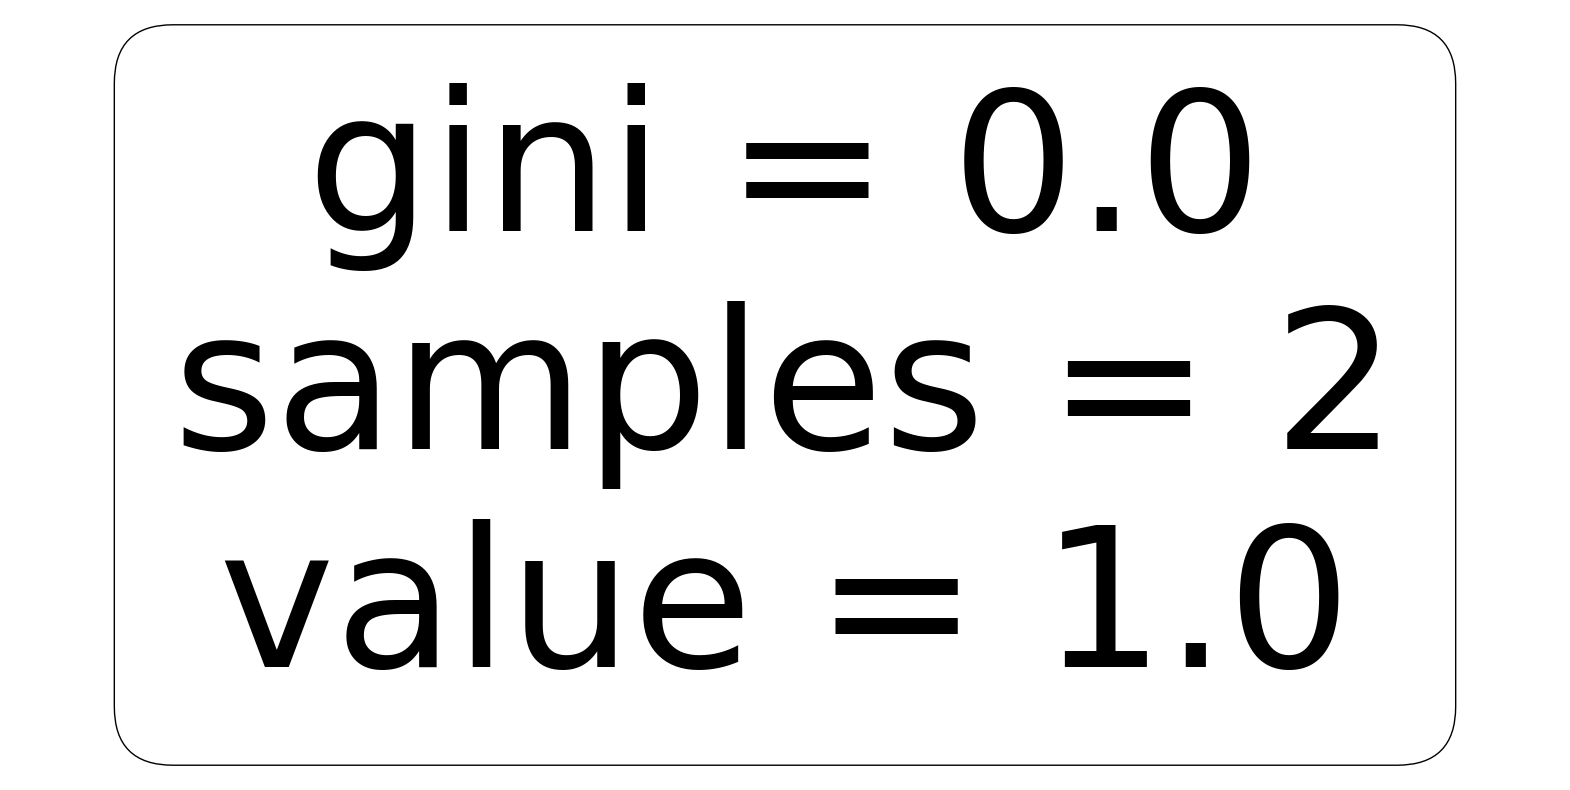

In [105]:
from sklearn.tree import plot_tree
tree=model.estimators_[0]
plt.figure(figsize=(20,10))
plot_tree(tree,
          feature_names=Feature_names,class_names=['No','Yes'],filled=True,rounded=True)
plt.show()